In [97]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# Autenticar la API de Kaggle
api = KaggleApi()
api.authenticate()

# Nombre del conjunto de datos
dataset_name = 'noaa/seismic-waves'

# Directorio donde se descargará y descomprimirá el conjunto de datos
base_path = 'C:/Users/nuria/Documents/proyecto'

# Crear el directorio si no existe
#os.makedirs(base_path, exist_ok=True)

# Descargar el conjunto de datos
api.dataset_download_files(dataset_name, path=base_path)

# Ruta completa del archivo zip descargado
zip_path = os.path.join(base_path, f'{dataset_name.split("/")[-1]}.zip')

# Descomprimir el archivo descargado
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(base_path)

In [51]:
df_sources = pd.read_csv(r'C:\Users\nuria\Documents\proyecto\sources.csv')
df_sources

,SOURCE_ID,YEAR,MONTH,DAY,HOUR,MINUTE,CAUSE,VALIDITY,FOCAL_DEPTH,PRIMARY_MAGNITUDE,...,ALL_INJURIES,INJURY_TOTAL,ALL_FATALITIES,FATALITY_TOTAL,ALL_DAMAGE_MILLIONS,DAMAGE_TOTAL,ALL_HOUSES_DAMAGED,HOUSE_DAMAGE_TOTAL,ALL_HOUSES_DESTROYED,HOUSE_DESTRUCTION_TOTAL
0,1,-2000,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
1,3,-1610,NaN,NaN,NaN,NaN,6.0,4.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,5,-1300,NaN,NaN,NaN,NaN,0.0,2.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,-760,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,19.0,10.0,1.0,4.0,21.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2578,5636,2016,12.0,17.0,10.0,51.0,1.0,4.0,103.0,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2579,5637,2016,12.0,25.0,14.0,22.0,1.0,4.0,35.0,7.6,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2580,5639,2017,1.0,3.0,21.0,5.0,1.0,4.0,17.0,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SOURCE_ID                   2582 non-null   int64  
 1   YEAR                        2582 non-null   int64  
 2   MONTH                       2443 non-null   float64
 3   DAY                         2341 non-null   float64
 4   HOUR                        1319 non-null   float64
 5   MINUTE                      1233 non-null   float64
 6   CAUSE                       2576 non-null   float64
 7   VALIDITY                    2580 non-null   float64
 8   FOCAL_DEPTH                 867 non-null    float64
 9   PRIMARY_MAGNITUDE           1459 non-null   float64
 10  REGION_CODE                 2581 non-null   float64
 11  COUNTRY                     2581 non-null   object 
 12  STATE/PROVINCE              293 non-null    object 
 13  LOCATION                    2570 

In [53]:
df_sources.isnull().sum()

SOURCE_ID                        0
YEAR                             0
MONTH                          139
DAY                            241
HOUR                          1263
MINUTE                        1349
CAUSE                            6
VALIDITY                         2
FOCAL_DEPTH                   1715
PRIMARY_MAGNITUDE             1123
REGION_CODE                      1
COUNTRY                          1
STATE/PROVINCE                2289
LOCATION                        12
LATITUDE                       359
LONGITUDE                      360
MAXIMUM_HEIGHT                1540
MAGNITUDE_ABE                 2582
MAGNITUDE_IIDA                1841
INTENSITY_SOLOVIEV            1358
WARNING_STATUS                2531
MISSING                       2526
MISSING_ESTIMATE              2514
INJURIES                      2578
INJURY_ESTIMATE               2578
FATALITIES                    2346
FATALITY_ESTIMATE             2258
DAMAGE_MILLIONS_DOLLARS       2542
DAMAGE_ESTIMATE     

df_sources tiene muchas columnas con valores nulos. Coincide que esas columnas no las voy a utilizar por lo que me quedo unicamente con las columnas que no tienen nulos o muy poco:

- SOURCE_ID: identificador único para cada registro
- YEAR: año en el que ocurrio el tsunami
- MONTH 
- DAY
- CAUSE: Código de Causa del Tsunami. Valores válidos: 0 a 11.La fuente del tsunami:
    - 0: Desconocido
    - 1:Terremoto
    - 2: Terremoto cuestionable
    - 3: Terremoto y deslizamiento de tierra
    - 4: Volcán y terremoto
    - 5: Volcán, terremoto y deslizamiento de tierra
    - 6: Volcán
    - 7: Volcán y deslizamiento de tierra
    - 8: Deslizamiento de tierra
    - 9:Meteorológico
    - 10: Explosión
    - 11: Marea astronómica

- VALIDITY: Valores válidos: -1 a 4. La validez del tsunami real se indica mediante una calificación numérica de los informes de ese evento:
    - -1: Entrada errónea
    - 0: Evento que solo causó un seiche o perturbación en un río o lago interior
    - 1: Tsunami muy dudoso
    - 2: Tsunami cuestionable
    - 3: Tsunami probable
    - 4:Tsunami definitivo
- REGION_CODE: Regional boundaries defined as follows:
    - 87 - Alaska (including Aleutian Islands)
    - 40 - Black Sea and Caspian Sea
    - 74 - Caribbean Sea
    - 78 - Central Africa
    - 84 - China, North and South Korea, Philippines, Taiwan
    - 81 - E Coast Australia, New Zealand, South Pacific Is.
    - 75 - East Coast USA and Canada, St Pierre and Miquelon
    - 76 - Gulf of Mexico
    - 80 - Hawaii, Johnston Atoll, Midway I
    - 60 - Indian Ocean (including west coast of Australia)
    - 83 - Indonesia (Pacific Ocean) and Malaysia
    - 85 - Japan
    - 86 - Kamchatka and Kuril Islands
    - 50 - Mediterranean Sea
    - 82 - New Caledonia, New Guinea, Solomon Is., Vanuatu
    - 73 - Northeast Atlantic Ocean
    - 72 - Northwest Atlantic Ocean
    - 30 - Red Sea and Persian Gulf
    - 70 - Southeast Atlantic Ocean
    - 71 - Southwest Atlantic Ocean
    - 77 - West Coast of Africa
    - 88 - West Coast of North and Central America
    - 89 - West Coast of South America

- COUNTRY: El país donde ocurrió la fuente del tsunami (por ejemplo, ingresa: Japón o Rusia).
- LOCATION: El país, estado, provincia o isla donde ocurrió la fuente del tsunami (por ejemplo, ingresa: Japón o Honshu).Esta es solo una ubicación geográfica aproximada. Los eventos anteriores a 1900 no fueron ubicados instrumentalmente, por lo tanto, la ubicación proporcionada se basa en la latitud y longitud de la ciudad donde ocurrieron los efectos máximos. Si hay diferentes formas de escribir el nombre de una ciudad, los nombres adicionales están entre paréntesis.

In [54]:
df_sources.duplicated().sum()

0

In [55]:
df_sources = df_sources.drop(['HOUR','MINUTE', 'FOCAL_DEPTH','PRIMARY_MAGNITUDE', 'STATE/PROVINCE', 'LATITUDE', 'LONGITUDE','MAXIMUM_HEIGHT','MAGNITUDE_ABE','MAGNITUDE_IIDA','INTENSITY_SOLOVIEV','WARNING_STATUS','MISSING','MISSING_ESTIMATE','INJURIES','INJURY_ESTIMATE','FATALITIES','FATALITY_ESTIMATE','DAMAGE_MILLIONS_DOLLARS','DAMAGE_ESTIMATE',
'HOUSES_DAMAGED','HOUSE_DAMAGE_ESTIMATE','HOUSES_DESTROYED','HOUSE_DESTRUCTION_ESTIMATE','ALL_MISSING','MISSING_TOTAL','ALL_INJURIES','INJURY_TOTAL','ALL_FATALITIES','FATALITY_TOTAL','ALL_DAMAGE_MILLIONS','DAMAGE_TOTAL','ALL_HOUSES_DAMAGED','HOUSE_DAMAGE_TOTAL','ALL_HOUSES_DESTROYED','HOUSE_DESTRUCTION_TOTAL'], axis=1)
df_sources

,SOURCE_ID,YEAR,MONTH,DAY,CAUSE,VALIDITY,REGION_CODE,COUNTRY,LOCATION
0,1,-2000,NaN,NaN,1.0,1.0,50.0,SYRIA,SYRIAN COASTS
1,3,-1610,NaN,NaN,6.0,4.0,50.0,GREECE,THERA ISLAND (SANTORINI)
2,4,-1365,NaN,NaN,1.0,1.0,50.0,SYRIA,SYRIAN COASTS
3,5,-1300,NaN,NaN,0.0,2.0,50.0,TURKEY,"IONIAN COASTS, TROAD"
4,6,-760,NaN,NaN,0.0,2.0,50.0,ISRAEL,ISRAEL AND LEBANON COASTS
...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,1.0,4.0,82.0,SOLOMON ISLANDS,SOLOMON ISLANDS
2578,5636,2016,12.0,17.0,1.0,4.0,82.0,PAPUA NEW GUINEA,SOLOMON SEA
2579,5637,2016,12.0,25.0,1.0,4.0,89.0,CHILE,SOUTHERN CHILE
2580,5639,2017,1.0,3.0,1.0,4.0,81.0,FIJI,FIJI ISLANDS


In [56]:
df_sources.isnull().sum()

SOURCE_ID        0
YEAR             0
MONTH          139
DAY            241
CAUSE            6
VALIDITY         2
REGION_CODE      1
COUNTRY          1
LOCATION        12
dtype: int64

Las columnas YEAR y SOURCE_ID no contienen nulos 
  
Antes de 1962 no había métodos de localización computarizados.

Elimino las entradas nulas de CAUSE, VALIDITY , REGION_CODE, LOCATION, COUNTRY para realizar algunas visualizaciones

In [57]:
df_sources = df_sources.dropna(subset=['VALIDITY', 'CAUSE','REGION_CODE','LOCATION'])
df_sources.isnull().sum()

SOURCE_ID        0
YEAR             0
MONTH          137
DAY            239
CAUSE            0
VALIDITY         0
REGION_CODE      0
COUNTRY          1
LOCATION         0
dtype: int64

In [58]:
df_sources = df_sources.dropna(subset=['COUNTRY'])
df_sources.isnull().sum()

SOURCE_ID        0
YEAR             0
MONTH          137
DAY            239
CAUSE            0
VALIDITY         0
REGION_CODE      0
COUNTRY          0
LOCATION         0
dtype: int64

realizo un mapeo de los códigos de CAUSES, VALIDITY y REGION_CODE para añadir los datos a lso que hacen referencias esos códigos númericos.

In [59]:
# Mapeo 
causes = {
    0: "Desconocido",
    1: "Terremoto",
    2: "Terremoto cuestionable",
    3: "Terremoto y deslizamiento de tierra",
    4: "Volcán y terremoto",
    5: "Volcán, terremoto y deslizamiento de tierra",
    6: "Volcán",
    7: "Volcán y deslizamiento de tierra",
    8: "Deslizamiento de tierra",
    9: "Meteorológico",
    10: "Explosión",
    11: "Marea astronómica"
}


validities= {
    -1: "Entrada errónea",
    0: "seiche, perturbación río o lago interior", 
    1: "Tsunami muy dudoso",
    2: "Tsunami cuestionable",
    3: "Tsunami probable", 
    4: "Tsunami definitivo"
}

region = {
    87: "Alaska (including Aleutian Islands)",
    40: "Black Sea and Caspian Sea",
    74: "Caribbean Sea",
    78: "Central Africa",
    84: "China, North and South Korea, Philippines, Taiwan",
    81: "E Coast Australia, New Zealand, South Pacific Is.",
    75: "East Coast USA and Canada, St Pierre and Miquelon",
    76: "Gulf of Mexico",
    80: "Hawaii, Johnston Atoll, Midway I",
    60: "Indian Ocean (including west coast of Australia)",
    83: "Indonesia (Pacific Ocean) and Malaysia",
    85: "Japan",
    86: "Kamchatka and Kuril Islands",
    50: "Mediterranean Sea",
    82: "New Caledonia, New Guinea, Solomon Is., Vanuatu",
    73: "Northeast Atlantic Ocean",
    72: "Northwest Atlantic Ocean",
    30: "Red Sea and Persian Gulf",
    70: "Southeast Atlantic Ocean",
    71: "Southwest Atlantic Ocean",
    77: "West Coast of Africa",
    88: "West Coast of North and Central America",
    89: "West Coast of South America"
}



# Asignar la validez mapeadas a una nueva columna llamada 'VALIDITIES' usando .loc[]
df_sources.loc[:, 'VALIDITIES'] = df_sources['VALIDITY'].apply(lambda x: validities.get(x, "Desconocido"))

# Asignar las regiones mapeadas a una nueva columna llamada 'REGIONS' usando .loc[]
df_sources.loc[:, 'REGION'] = df_sources['REGION_CODE'].apply(lambda x: region.get(x, "Desconocido"))


# Asignar las causas mapeadas a una nueva columna llamada 'CAUSES' usando .loc[]
df_sources.loc[:, 'CAUSES'] = df_sources['CAUSE'].apply(lambda x: causes.get(x, "Desconocido"))


df_sources = df_sources.drop(['VALIDITY','REGION_CODE', 'CAUSE'], axis=1)

df_sources



,SOURCE_ID,YEAR,MONTH,DAY,COUNTRY,LOCATION,VALIDITIES,REGION,CAUSES
0,1,-2000,NaN,NaN,SYRIA,SYRIAN COASTS,Tsunami muy dudoso,Mediterranean Sea,Terremoto
1,3,-1610,NaN,NaN,GREECE,THERA ISLAND (SANTORINI),Tsunami definitivo,Mediterranean Sea,Volcán
2,4,-1365,NaN,NaN,SYRIA,SYRIAN COASTS,Tsunami muy dudoso,Mediterranean Sea,Terremoto
3,5,-1300,NaN,NaN,TURKEY,"IONIAN COASTS, TROAD",Tsunami cuestionable,Mediterranean Sea,Desconocido
4,6,-760,NaN,NaN,ISRAEL,ISRAEL AND LEBANON COASTS,Tsunami cuestionable,Mediterranean Sea,Desconocido
...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,SOLOMON ISLANDS,SOLOMON ISLANDS,Tsunami definitivo,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Terremoto
2578,5636,2016,12.0,17.0,PAPUA NEW GUINEA,SOLOMON SEA,Tsunami definitivo,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Terremoto
2579,5637,2016,12.0,25.0,CHILE,SOUTHERN CHILE,Tsunami definitivo,West Coast of South America,Terremoto
2580,5639,2017,1.0,3.0,FIJI,FIJI ISLANDS,Tsunami definitivo,"E Coast Australia, New Zealand, South Pacific Is.",Terremoto


# VISUALIZACIONES ANTES 1960

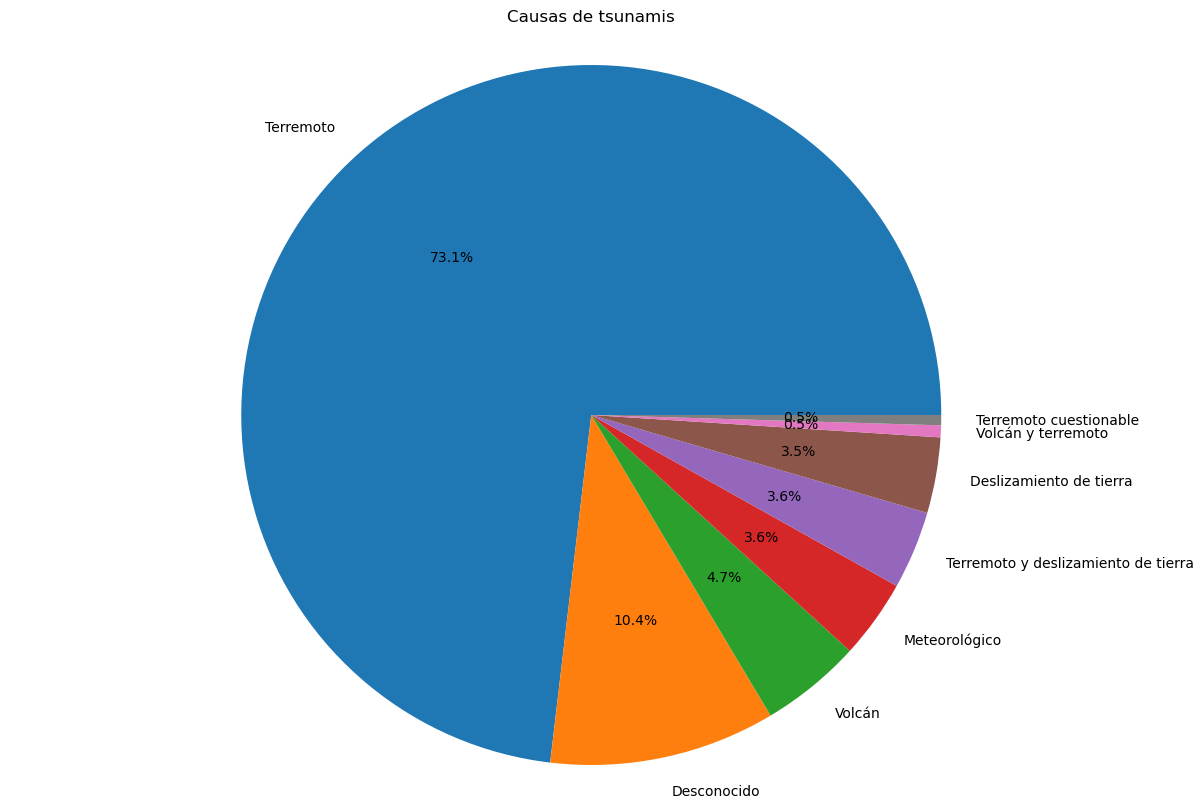

In [60]:
# Calcula el conteo de cada causa
causes_count = df_sources['CAUSES'].value_counts()

# Filtra solo las causas que tengan una frecuencia mayor o igual a 10
causes_filtered = causes_count[causes_count >= 10]

# Crea el gráfico de pastel
plt.figure(figsize=(15, 10))
plt.pie(causes_filtered, labels=causes_filtered.index, autopct='%1.1f%%')
plt.title('Causas de tsunamis')
plt.axis('equal')  # Asegura que el pastel se dibuje como un círculo.
plt.show()

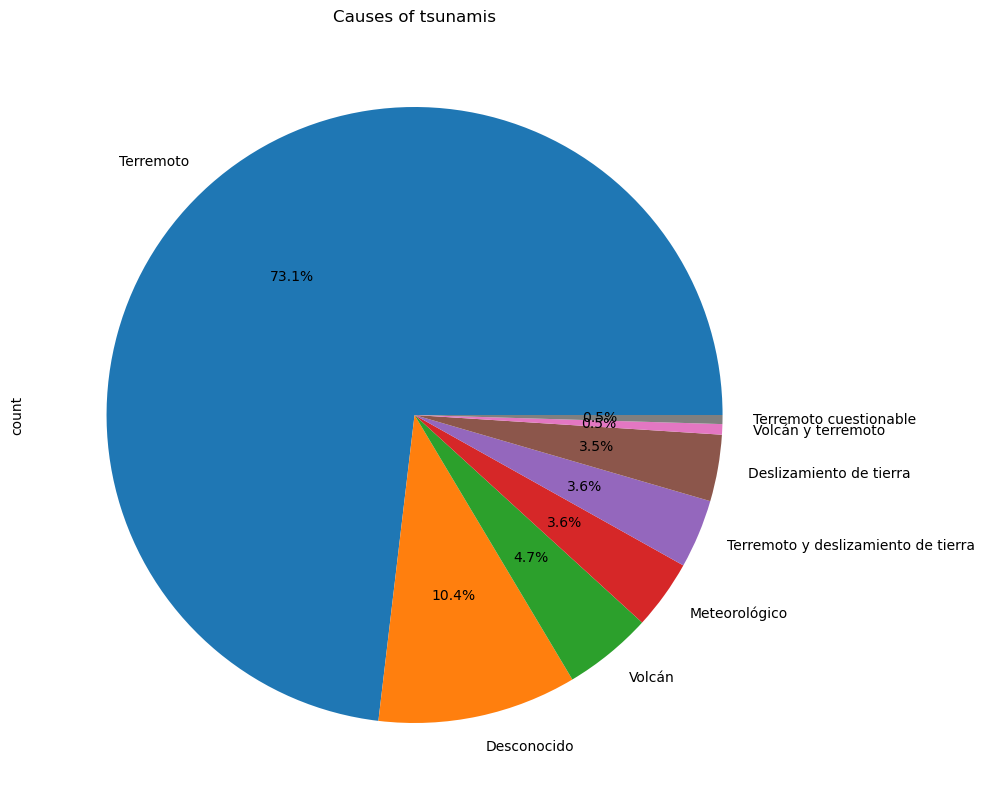

In [36]:

# Asignar la frecuencia de las causas a una nueva columna llamada 'CAUSES_FRECUENCY' utilizando .loc[]
df_sources.loc[:, 'CAUSES_FRECUENCY'] = df_sources.groupby('CAUSES')['CAUSES'].transform('count')



#Causes of tsunamis
df_sources.CAUSES[df_sources.CAUSES_FRECUENCY >=10].value_counts().plot(kind='pie',
                                            legend=False,
                                            figsize=(15,10),
                                            title="Causes of tsunamis",
                                            autopct='%.1f%%');

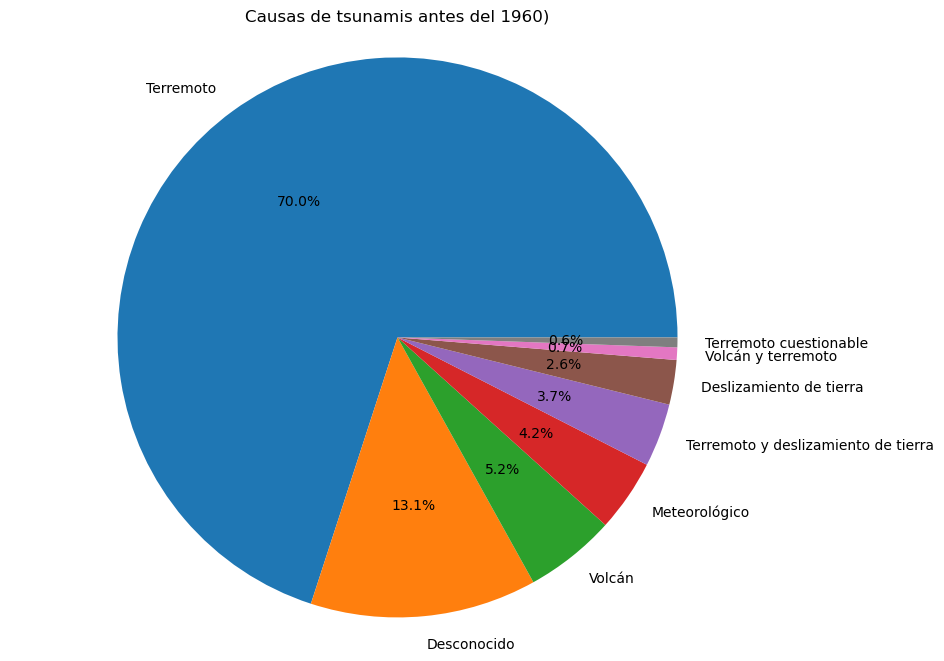

In [61]:
# Filtra los datos con YEAR anterior a 1960
df_before = df_sources[df_sources['YEAR'] < 1960]

# Calcula el conteo de cada causa en los datos filtrados
causes_count = df_before['CAUSES'].value_counts()

# Filtra solo las causas que tengan una frecuencia mayor o igual a 10
causes_filtered = causes_count[causes_count >= 10]

# Crea el gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(causes_filtered, labels=causes_filtered.index, autopct='%1.1f%%')
plt.title('Causas de tsunamis antes del 1960)')
plt.axis('equal')  # Asegura que el pastel se dibuje como un círculo.
plt.show()

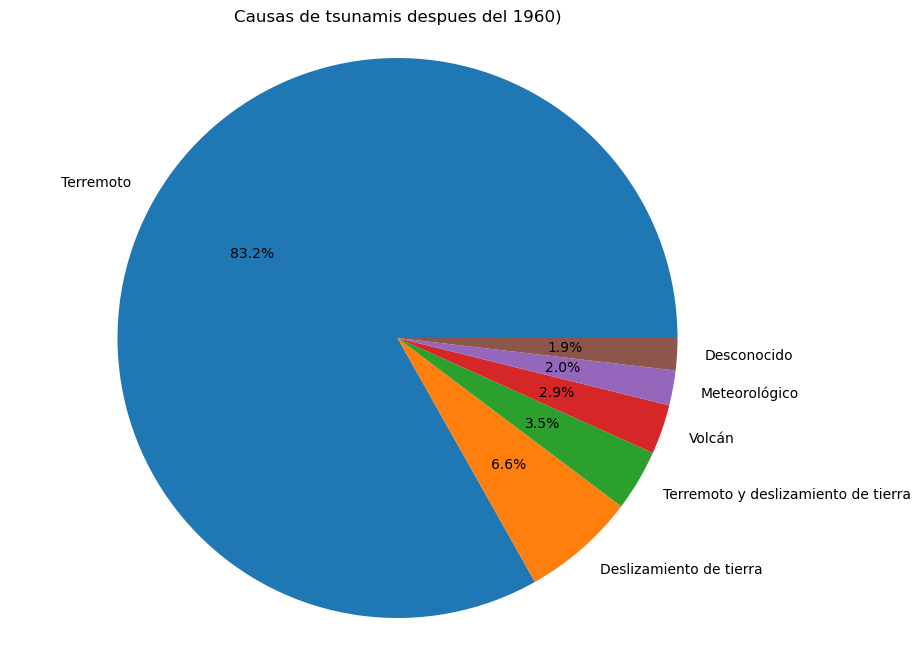

In [62]:
# Filtra los datos con YEAR posterior a 1960
df_after = df_sources[df_sources['YEAR'] > 1960]

# Calcula el conteo de cada causa en los datos filtrados
causes_count = df_after['CAUSES'].value_counts()

# Filtra solo las causas que tengan una frecuencia mayor o igual a 10
causes_filtered = causes_count[causes_count >= 10]

# Crea el gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(causes_filtered, labels=causes_filtered.index, autopct='%1.1f%%')
plt.title('Causas de tsunamis despues del 1960)')
plt.axis('equal')  # Asegura que el pastel se dibuje como un círculo.
plt.show()

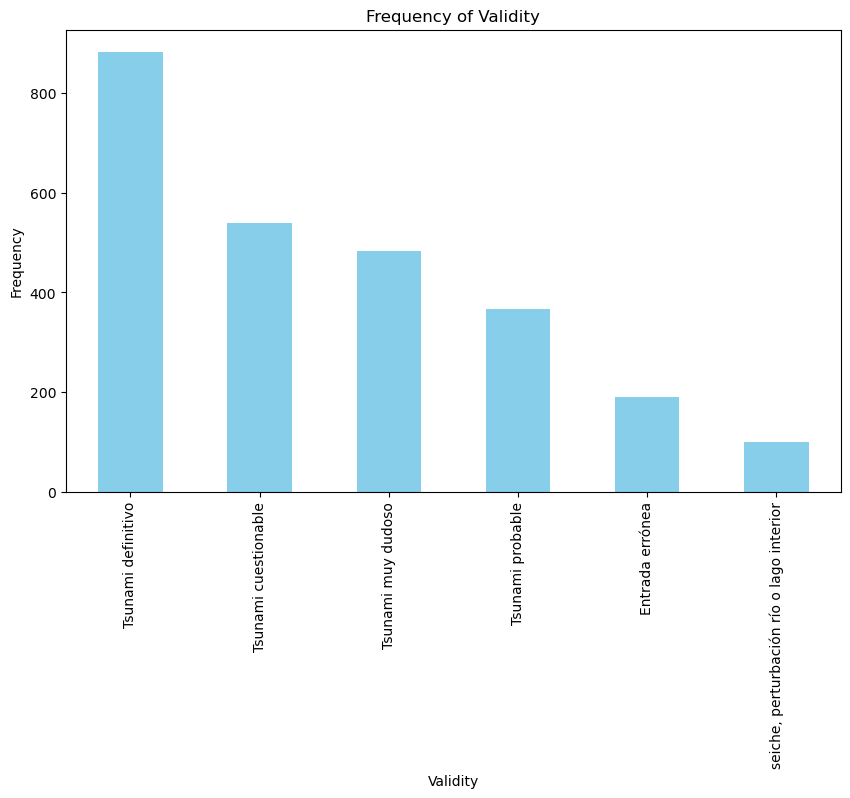

In [63]:
plt.figure(figsize=(10, 6))
df_sources['VALIDITIES'].value_counts().plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Validity')
plt.ylabel('Frequency')
plt.title('Frequency of Validity')

# Mostrar el gráfico
plt.show()

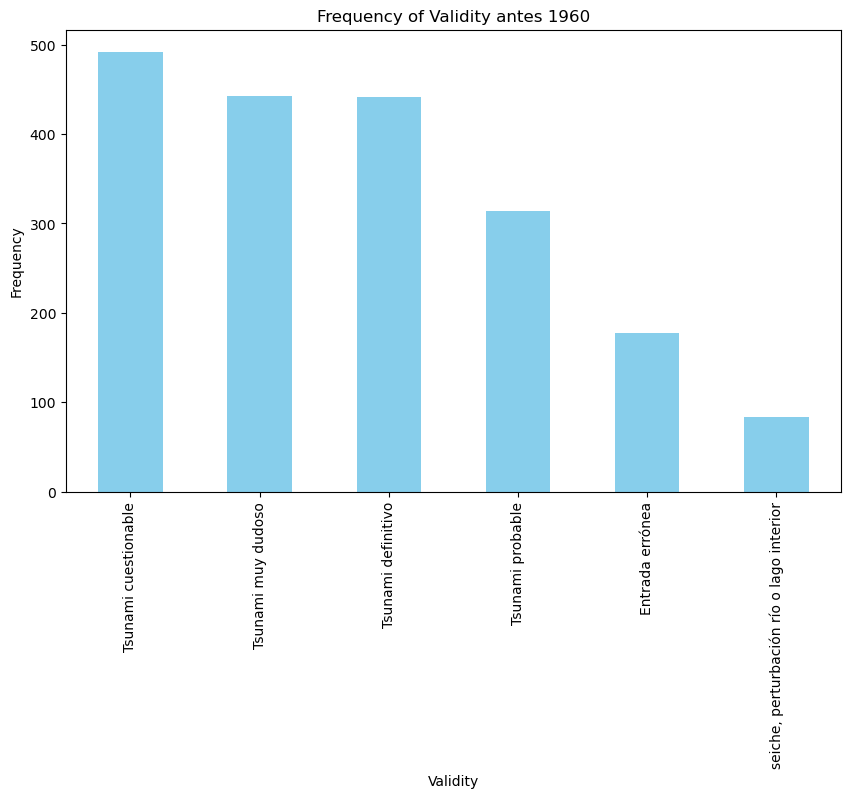

In [64]:

plt.figure(figsize=(10, 6))
df_before['VALIDITIES'].value_counts().plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Validity')
plt.ylabel('Frequency')
plt.title('Frequency of Validity antes 1960')

# Mostrar el gráfico
plt.show()


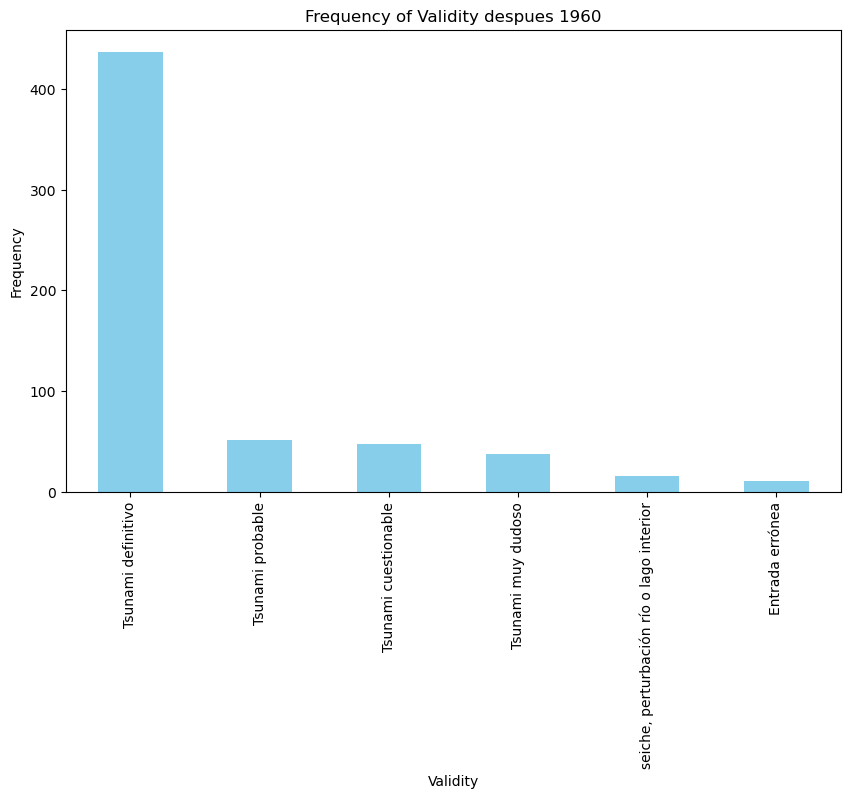

In [66]:

plt.figure(figsize=(10, 6))
df_after['VALIDITIES'].value_counts().plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Validity')
plt.ylabel('Frequency')
plt.title('Frequency of Validity despues 1960')

# Mostrar el gráfico
plt.show()

Elimino las entradas previas a 1960 

In [67]:
df_sources.drop(df_sources[df_sources['YEAR'] < 1960].index, inplace=True)
df_sources.isnull().sum()

SOURCE_ID     0
YEAR          0
MONTH         1
DAY           2
COUNTRY       0
LOCATION      0
VALIDITIES    0
REGION        0
CAUSES        0
dtype: int64

In [68]:
df_sources[df_sources['DAY'].isnull()]

,SOURCE_ID,YEAR,MONTH,DAY,COUNTRY,LOCATION,VALIDITIES,REGION,CAUSES
2051,5478,1966,NaN,NaN,SOLOMON ISLANDS,"TINAKULA, SANTA CRUZ ISLANDS",Tsunami probable,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Volcán
2280,2195,1990,5.0,NaN,PHILIPPINES,"CANIGUIN IS.,PHILIPPINES",Tsunami muy dudoso,"China, North and South Korea, Philippines, Taiwan",Desconocido


In [69]:
df_sources = df_sources.dropna(subset=['DAY'])
df_sources.isnull().sum()

SOURCE_ID     0
YEAR          0
MONTH         0
DAY           0
COUNTRY       0
LOCATION      0
VALIDITIES    0
REGION        0
CAUSES        0
dtype: int64

In [71]:
df_sources.loc[:, 'DATE'] = pd.to_datetime(df_sources[['YEAR', 'MONTH', 'DAY']])

df_sources

,SOURCE_ID,YEAR,MONTH,DAY,COUNTRY,LOCATION,VALIDITIES,REGION,CAUSES,DATE
1969,1896,1960,1.0,13.0,PERU,S. PERU,Tsunami muy dudoso,West Coast of South America,Terremoto,1960-01-13
1970,1897,1960,2.0,29.0,MOROCCO,MOROCCO,Tsunami muy dudoso,West Coast of Africa,Terremoto,1960-02-29
1971,1898,1960,3.0,20.0,JAPAN,SANRIKU,Tsunami definitivo,Japan,Terremoto,1960-03-20
1972,1899,1960,3.0,23.0,JAPAN,SANRIKU,Tsunami definitivo,Japan,Terremoto,1960-03-23
1973,1901,1960,5.0,21.0,CHILE,CENTRAL CHILE,Tsunami definitivo,West Coast of South America,Terremoto,1960-05-21
...,...,...,...,...,...,...,...,...,...,...
2577,5632,2016,12.0,9.0,SOLOMON ISLANDS,SOLOMON ISLANDS,Tsunami definitivo,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Terremoto,2016-12-09
2578,5636,2016,12.0,17.0,PAPUA NEW GUINEA,SOLOMON SEA,Tsunami definitivo,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Terremoto,2016-12-17
2579,5637,2016,12.0,25.0,CHILE,SOUTHERN CHILE,Tsunami definitivo,West Coast of South America,Terremoto,2016-12-25
2580,5639,2017,1.0,3.0,FIJI,FIJI ISLANDS,Tsunami definitivo,"E Coast Australia, New Zealand, South Pacific Is.",Terremoto,2017-01-03


In [73]:
df_sources = df_sources.drop(['DAY','MONTH','YEAR'], axis=1)
df_sources.reset_index(drop=True, inplace=True)
df_sources


,SOURCE_ID,COUNTRY,LOCATION,VALIDITIES,REGION,CAUSES,DATE
0,1896,PERU,S. PERU,Tsunami muy dudoso,West Coast of South America,Terremoto,1960-01-13
1,1897,MOROCCO,MOROCCO,Tsunami muy dudoso,West Coast of Africa,Terremoto,1960-02-29
2,1898,JAPAN,SANRIKU,Tsunami definitivo,Japan,Terremoto,1960-03-20
3,1899,JAPAN,SANRIKU,Tsunami definitivo,Japan,Terremoto,1960-03-23
4,1901,CHILE,CENTRAL CHILE,Tsunami definitivo,West Coast of South America,Terremoto,1960-05-21
...,...,...,...,...,...,...,...
603,5632,SOLOMON ISLANDS,SOLOMON ISLANDS,Tsunami definitivo,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Terremoto,2016-12-09
604,5636,PAPUA NEW GUINEA,SOLOMON SEA,Tsunami definitivo,"New Caledonia, New Guinea, Solomon Is., Vanuatu",Terremoto,2016-12-17
605,5637,CHILE,SOUTHERN CHILE,Tsunami definitivo,West Coast of South America,Terremoto,2016-12-25
606,5639,FIJI,FIJI ISLANDS,Tsunami definitivo,"E Coast Australia, New Zealand, South Pacific Is.",Terremoto,2017-01-03


In [74]:
df_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SOURCE_ID   608 non-null    int64         
 1   COUNTRY     608 non-null    object        
 2   LOCATION    608 non-null    object        
 3   VALIDITIES  608 non-null    object        
 4   REGION      608 non-null    object        
 5   CAUSES      608 non-null    object        
 6   DATE        608 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 33.4+ KB


In [75]:
df_sources = df_sources.set_index("DATE")
df_sources.head()

,SOURCE_ID,COUNTRY,LOCATION,VALIDITIES,REGION,CAUSES
DATE,,,,,,
1960-01-13,1896,PERU,S. PERU,Tsunami muy dudoso,West Coast of South America,Terremoto
1960-02-29,1897,MOROCCO,MOROCCO,Tsunami muy dudoso,West Coast of Africa,Terremoto
1960-03-20,1898,JAPAN,SANRIKU,Tsunami definitivo,Japan,Terremoto
1960-03-23,1899,JAPAN,SANRIKU,Tsunami definitivo,Japan,Terremoto
1960-05-21,1901,CHILE,CENTRAL CHILE,Tsunami definitivo,West Coast of South America,Terremoto


# + VISUALIZACIONES

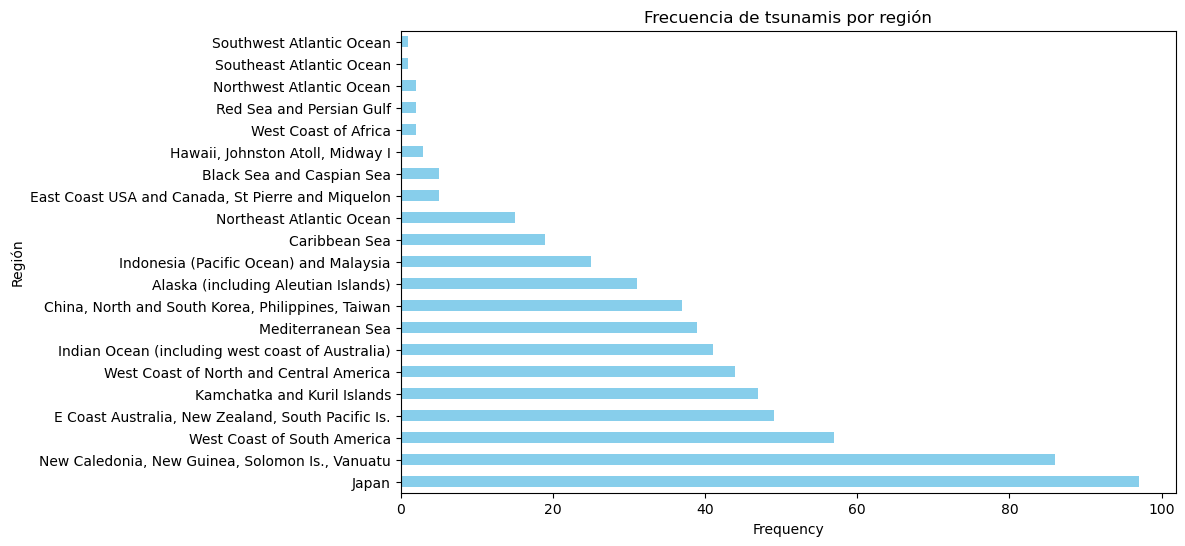

In [24]:
plt.figure(figsize=(10, 6))
df_sources['REGION'].value_counts().plot(kind='barh', color='skyblue')

# Añadir etiquetas y título
plt.ylabel('Región')
plt.xlabel('Frequency')
plt.title('Frecuencia de tsunamis por región')

# Mostrar el gráfico
plt.show()

# PREDICCIÓN

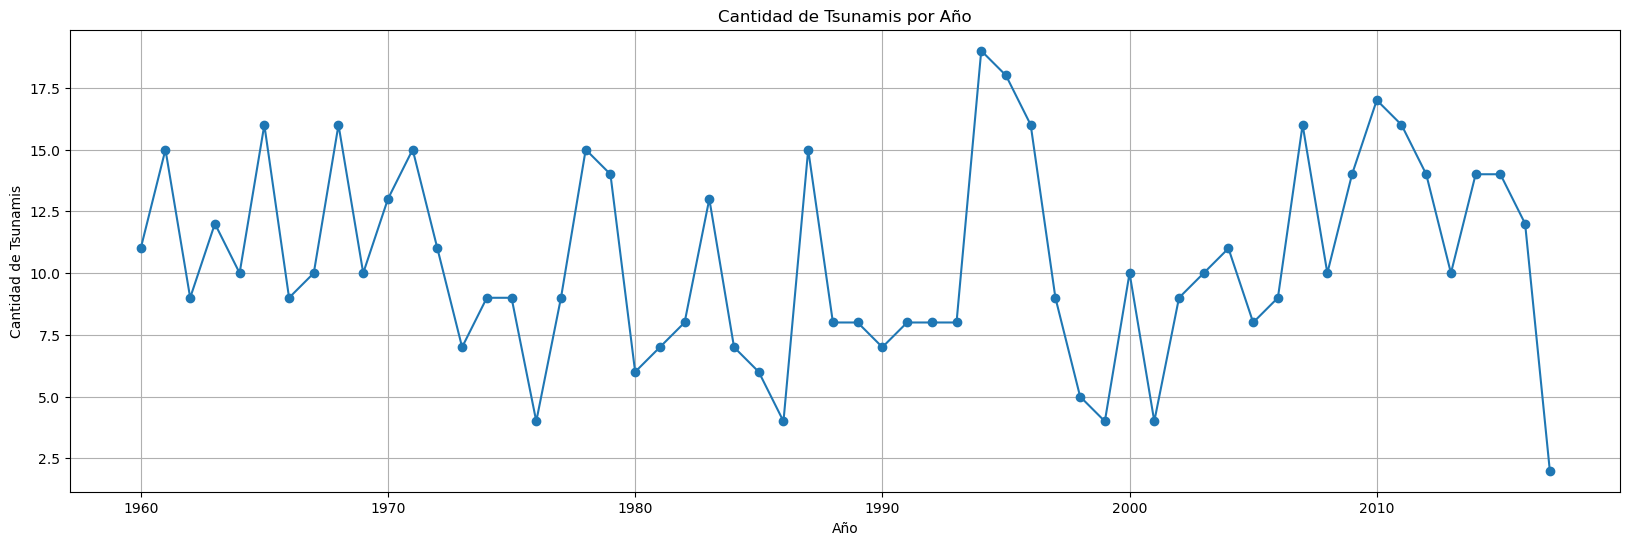

In [78]:
# Agrupar por año y contar la cantidad de tsunamsis
df_por_año = df_sources.groupby(df_sources.index.year).size()

# Grafica de línea
plt.figure(figsize=(20, 6))
plt.plot(df_por_año.index, df_por_año, marker='o')
plt.title('Cantidad de Tsunamis por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Tsunamis')
plt.grid(True)
plt.show()


In [79]:
df_por_año

DATE
1960    11
1961    15
1962     9
1963    12
1964    10
1965    16
1966     9
1967    10
1968    16
1969    10
1970    13
1971    15
1972    11
1973     7
1974     9
1975     9
1976     4
1977     9
1978    15
1979    14
1980     6
1981     7
1982     8
1983    13
1984     7
1985     6
1986     4
1987    15
1988     8
1989     8
1990     7
1991     8
1992     8
1993     8
1994    19
1995    18
1996    16
1997     9
1998     5
1999     4
2000    10
2001     4
2002     9
2003    10
2004    11
2005     8
2006     9
2007    16
2008    10
2009    14
2010    17
2011    16
2012    14
2013    10
2014    14
2015    14
2016    12
2017     2
dtype: int64

## -----------------------------------------------------------------------------------------------------------

In [ ]:
!pip install pmdarima

In [81]:
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos en conjunto de entrenamiento y prueba con test_size=0.2
train, test = train_test_split(df_por_año, test_size=0.2, shuffle=False)  # Asumiendo que no necesitas que los datos se mezclen

# Crear índices para los conjuntos de entrenamiento y prueba
x_train = np.array(range(train.shape[0]))
x_test = np.array(range(train.shape[0], df_por_año.shape[0]))

# Imprimir las formas de los conjuntos de datos
print('Train shape:', train.shape)
print('x_train shape:', x_train.shape)
print('Test shape:', test.shape)
print('x_test shape:', x_test.shape)


Train shape: (46,)
x_train shape: (46,)
Test shape: (12,)
x_test shape: (12,)


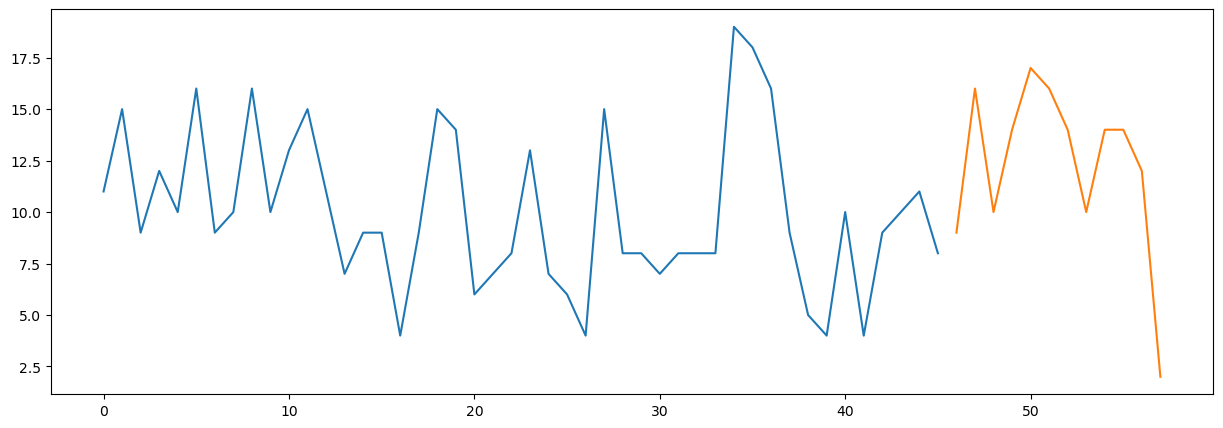

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [83]:
from pmdarima.arima import auto_arima

In [84]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=269.548, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=266.918, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=267.557, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=267.062, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=264.939, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=265.085, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=254.699, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=256.268, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=256.523, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=256.608, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=254.849, Time=0.01 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.06 se

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   46
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -124.349
Date:                Mon, 12 Feb 2024   AIC                            254.699
Time:                        10:56:01   BIC                            260.119
Sample:                             0   HQIC                           256.719
                                 - 46                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2956      0.163      1.814      0.070      -0.024       0.615
ma.L1         -0.9871      0.303     -3.255      0.001      -1.581      -0.393
sigma2        13.8521      6.430      2.154      0.031       1.249      26.455
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.73
Prob(Q):                              0.85   Prob(JB):                         0.25
Heteroskedasticity (H):               1.67   Skew:                             0.60
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El valor estadístico de la prueba de Ljung-Box (L1) es 0.04, y el valor p asociado (Prob(Q)) es 0.85. Dado que Prob(Q) es mayor que 0.05, no podemos rechazar la hipótesis nula de independencia en los residuos. Esto sugiere que los residuos no muestran correlación significativa.


El valor estadístico de la prueba de Jarque-Bera (JB) es 2.73, y el valor p asociado (Prob(JB)) es 0.25. Dado que Prob(JB) es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que los residuos siguen una distribución normal. Esto sugiere que los residuos podrían ser aproximadamente normalmente distribuidos.


El valor de la prueba de heterocedasticidad (H) es 1.67, y el valor p asociado (Prob(H)) es 0.33. Dado que Prob(H) es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad. Sin embargo, la homocedasticidad no puede ser confirmada con certeza, ya que el valor p es relativamente cercano al umbral de significancia de 0.05.


El sesgo (Skew) es 0.60 y la curtosis (Kurtosis) es 2.84, lo que sugiere que los residuos pueden tener cierta asimetría y una forma de distribución ligeramente achatada en comparación con una distribución normal, aunque estos valores no son extremos.


En resumen, estos resultados indican que los residuos parecen ser independientes y aproximadamente normales, pero no se puede confirmar con certeza que tengan una varianza constante (homocedasticidad).

In [100]:
# Ajustar el modelo ARIMA automáticamente
model = auto_arima(train, seasonal=False)

# Realizar la predicción con intervalos de confianza
prediction, confint = model.predict(n_periods=len(test), return_conf_int=True)

# Imprimir las predicciones
print("Predicciones:", prediction)

# Imprimir los intervalos de confianza si lo deseas
print("Intervalos de confianza:", confint)

Predicciones: 46    9.455288
47    9.847467
48    9.953154
49    9.981635
50    9.989310
51    9.991378
52    9.991936
53    9.992086
54    9.992126
55    9.992137
56    9.992140
57    9.992141
dtype: float64
Intervalos de confianza: [[ 2.283537   16.62703998]
 [ 2.41986492 17.2750699 ]
 [ 2.50731329 17.39899446]
 [ 2.53447149 17.42879817]
 [ 2.54205064 17.43656942]
 [ 2.54411202 17.43864475]
 [ 2.5446689  17.43920265]
 [ 2.54481907 17.4393529 ]
 [ 2.54485955 17.43939338]
 [ 2.54487046 17.43940429]
 [ 2.5448734  17.43940723]
 [ 2.54487419 17.43940802]]


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [101]:
cf= pd.DataFrame(confint)

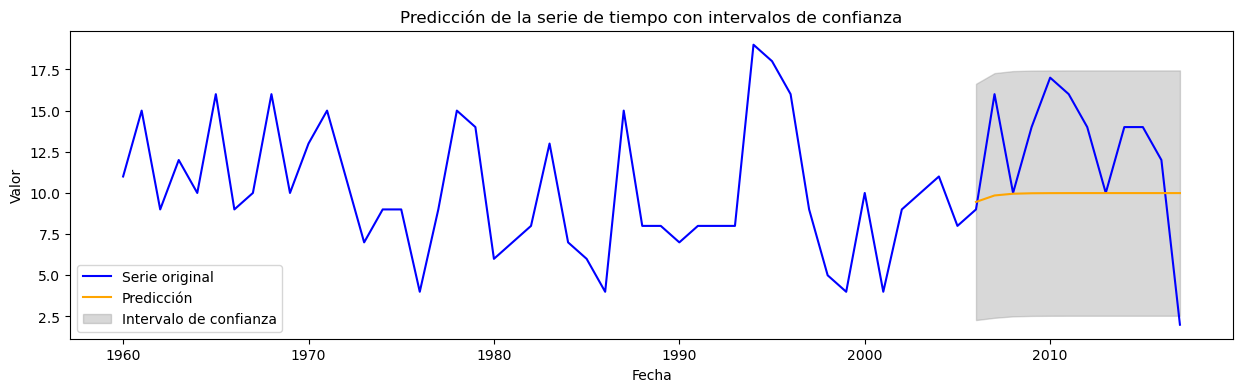

In [102]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 4))

# Graficar la serie de tiempo original
ax.plot(df_por_año.index, df_por_año, label='Serie original', color='blue')

# Graficar la predicción
ax.plot(test.index, prediction, label='Predicción', color='orange')

# Rellenar el área entre los intervalos de confianza
ax.fill_between(test.index, confint[:, 0], confint[:, 1], color='grey', alpha=0.3, label='Intervalo de confianza')

# Añadir etiquetas y leyenda
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor')
ax.set_title('Predicción de la serie de tiempo con intervalos de confianza')
ax.legend()

# Mostrar la gráfica
plt.show()



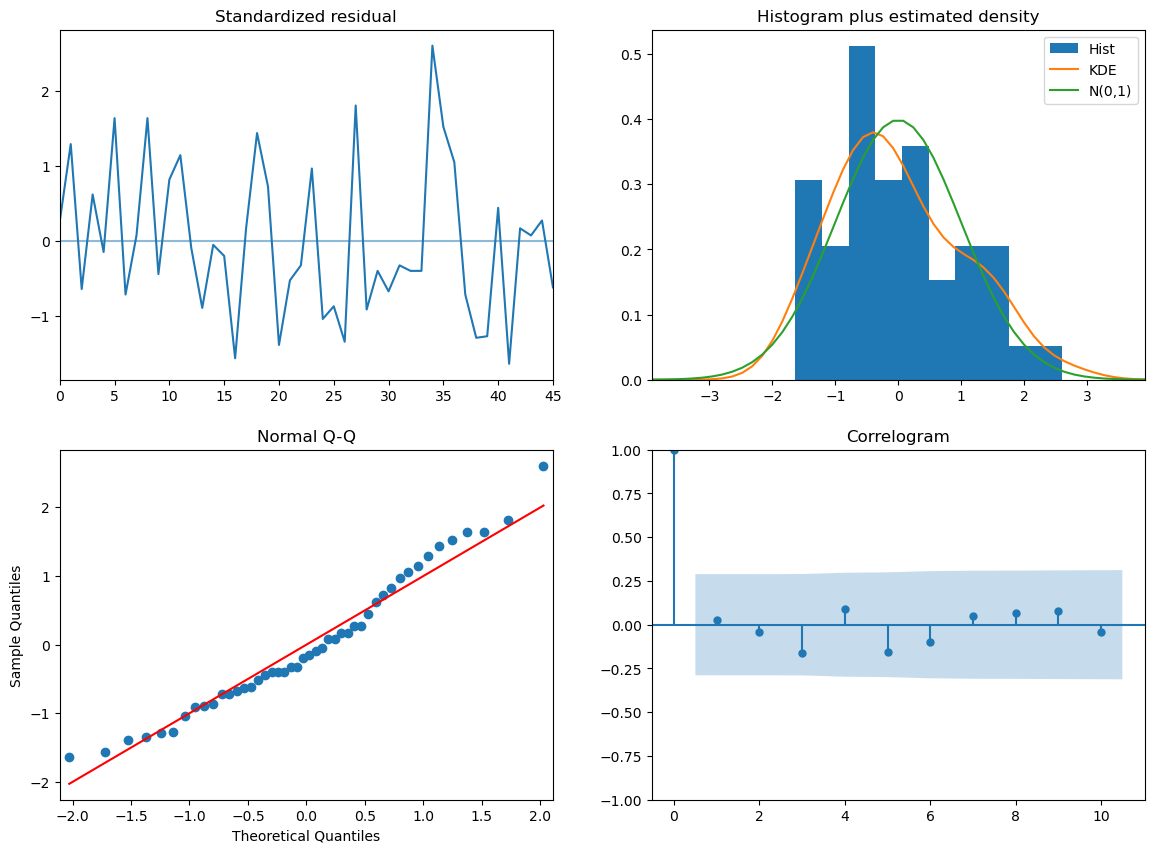

In [92]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

# PRECISION MODELO

In [99]:
# Calcula el MSE y el R^2
mse = mean_squared_error(test, prediction)
r2 = r2_score(test, prediction)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 21.296681684902037
Coeficiente de determinación (R^2): -0.354559259110377


un coeficiente de determinación R2 negativo (-0.35) es inusual y sugiere que el modelo no es útil para hacer predicciones sobre los datos. El R2 se interpreta generalmente como la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente en un modelo de regresión. Un R2  negativo significa que el modelo no se ajusta en absoluto a los datos y puede ser peor que simplemente utilizar la media como predicción.